# Document Clustering and Topic Modeling

## Part 1: Load Data

In [73]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import nltk
import re  # python regular expression
import os

import matplotlib.pyplot as plt
import lda
from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer


In [74]:
#import titles
titles=open('LaiOfferData_downloads/data/title_list.txt').read().split('\n') 
#open file, read into an array, split every new line to an individual element
titles=titles[:100] # only first 100 titles

#import wiki synopses and imdb synopses, combine to one synopses
synopses_wiki=open('LaiOfferData_downloads/data/synopses_list_wiki.txt').read().split('\n BREAKS HERE')
synopses_wiki=synopses_wiki[:100]

synopses_imdb=open('LaiOfferData_downloads/data/synopses_list_imdb.txt').read().split('\n BREAKS HERE')
synopses_imdb=synopses_imdb[:100]

synopses=[]
for i in range(len(titles)):
    synopses.append((synopses_wiki[i]+synopses_imdb[i]))

## Part 2: Tokenizing and Stemming

In [75]:
# Stop Words: 'a', 'the'... meaningless words.
## need to remove stopwords with NLTK function
# Stemming: process of breaking a word down into its root
## need to use stemmer function frim NLTK

# NLTK English stopwords
stopwords=nltk.corpus.stopwords.words('english')

#NLTK stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [76]:
#this function will be used in TFIDF for text tokenize and stemming
def tokenization_stemming(text):
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) 
            if word not in stopwords]
    # 1.sentence tokenize, 2. word tokenize, 3.lower case 
    filtered_tokens = []
    for token in tokens:
            if re.search('[a-zA-Z]', token): # only keep words having letters, remove numerical words
                filtered_tokens.append(token)
    stems=[stemmer.stem(t) for t in filtered_tokens]
    return stems
  
# only use for comparison    
def tokenization(text):
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) 
            if word not in stopwords]
    filtered_tokens=[]
    for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)
    return filtered_tokens

In [77]:
tokenization_stemming("she looked at her father's arm.")

[u'look', u'father', "'s", u'arm']

In [78]:
tokenization("she looked at her father's arm.")

['looked', 'father', "'s", 'arm']

In [79]:
# Comparison tokenization to stemming 
# Tokenize and stem the synopses
stemmed=[]
tokenized=[]
for i in synopses:
    stemmed.extend(tokenization_stemming(i))
    tokenized.extend(tokenization(i))

In [80]:
vocab_frame_dict={stemmed[x]:tokenized[x] for x in xrange(len(stemmed))}
items=vocab_frame_dict.items()
items[:5]

[(u'woodi', 'woody'),
 (u'yellow', 'yellow'),
 (u'four', 'four'),
 (u'two-for-the-price-of-on', 'two-for-the-price-of-one'),
 (u'enriqu', 'enrique')]

## Part 3: TF-IDF

In [81]:
# TFIDF vectorizer parameters
tfidf=TfidfVectorizer(max_df=0.8,max_features=200000,min_df=0.2,stop_words='english', 
                      use_idf=True, tokenizer=tokenization_stemming, ngram_range=(1,1))

tfidf_matrix=tfidf.fit_transform(synopses)

In [82]:
print 'In total, there are '+str(tfidf_matrix.shape[0])+' synopses and '+str(tfidf_matrix.shape[1]) +' terms.'

In total, there are 100 synopses and 538 terms.


In [83]:
tfidf.get_params()

{'analyzer': u'word',
 'binary': False,
 'decode_error': u'strict',
 'dtype': numpy.int64,
 'encoding': u'utf-8',
 'input': u'content',
 'lowercase': True,
 'max_df': 0.8,
 'max_features': 200000,
 'min_df': 0.2,
 'ngram_range': (1, 1),
 'norm': u'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': u'(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenization_stemming>,
 'use_idf': True,
 'vocabulary': None}

In [84]:
tf_selected_words=tfidf.get_feature_names()

In [85]:
len(tf_selected_words)

538

In [86]:
print tfidf_matrix

  (0, 134)	0.0473267628223
  (0, 133)	0.100142256222
  (0, 231)	0.0406338952993
  (0, 405)	0.114171476029
  (0, 327)	0.0754659397505
  (0, 536)	0.0590074324338
  (0, 124)	0.0652408434449
  (0, 192)	0.552178266051
  (0, 455)	0.239578887857
  (0, 262)	0.0456921978631
  (0, 234)	0.0455698592385
  (0, 426)	0.0464525128203
  (0, 319)	0.0442555743254
  (0, 230)	0.113001303979
  (0, 317)	0.0342149644576
  (0, 57)	0.0871506198292
  (0, 434)	0.0475587482303
  (0, 439)	0.0245750372251
  (0, 39)	0.0709901442334
  (0, 167)	0.030461465242
  (0, 373)	0.114171476029
  (0, 429)	0.0388525627111
  (0, 390)	0.0766711683362
  (0, 449)	0.0456921978631
  (0, 44)	0.074478403477
  :	:
  (99, 366)	0.0874261524564
  (99, 24)	0.0640326842603
  (99, 456)	0.132333990659
  (99, 349)	0.419498322794
  (99, 280)	0.061999245244
  (99, 245)	0.174944310535
  (99, 274)	0.0594293403113
  (99, 412)	0.153755537107
  (99, 452)	0.0938609693566
  (99, 465)	0.0982409961517
  (99, 329)	0.052529295972
  (99, 202)	0.0552711861938
 

## Part 4: K-means clustering

In [87]:
from sklearn.cluster import KMeans

num_clusters=5
km=KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters=km.labels_.tolist()

In [88]:
clusters[:10] 

[2, 1, 2, 1, 2, 1, 0, 0, 2, 2]

### 4.1 Analyze KMeans results

In [89]:
# create DataFrame films 
films={'title':titles, 'rank': range(100),'synopses':synopses,'cluster':clusters }
frame=pd.DataFrame(films,index=[clusters],columns=['rank','title','cluster'])

In [90]:
frame.head()

,rank,title,cluster
2,0,The Godfather,2
1,1,The Shawshank Redemption,1
2,2,Schindler's List,2
1,3,Raging Bull,1
2,4,Casablanca,2


In [91]:
print 'Number of films included in each clusters: '
frame['cluster'].value_counts().to_frame()

Number of films included in each clusters: 


,cluster
1,32
0,23
4,16
2,16
3,13


In [92]:
total_rank=frame['rank'].groupby(frame['cluster'])
print 'Average rank (1 to 100) per cluster: '
total_rank.mean().to_frame()

Average rank (1 to 100) per cluster: 


,rank
cluster,
0,54.000000
1,54.875000
2,36.750000
3,41.692308
4,51.375000


In [93]:
#km.cluster_centers_ denotes the importances of each items in centroid.
#need to sort it in decreasing_order and get the top k items (6)
order_centroids=km.cluster_centers_.argsort()[:,::-1] # parent list(cluster 5) keep the same order, 
                                                      # child list(each stemmed word 538) reverse order

In [94]:
#each num in child array means a selected word in tfidf model
#order_centroids[0][1] --cluster 0, 2nd important word's (1) index in tfidf selected word
order_centroids

array([[213, 194, 298, ..., 258, 235, 165],
       [ 83, 359, 320, ..., 452, 261, 477],
       [192, 511, 241, ..., 441, 334, 320],
       [452,  35, 212, ...,  78, 343, 319],
       [271, 514, 436, ..., 233, 156, 250]])

In [95]:
# cluster 0, most important tokenized word 
vocab_frame_dict[tf_selected_words[order_centroids[0][0]]] 

'george'

In [96]:
print '<Document clustering result by KMeans>'

Cluster_keywords={}
for i in range(num_clusters):
    print 'Cluster '+str(i)+' words:',
    Cluster_keywords[i]=[]
    for select_word_index in order_centroids[i,:6]:   # top 6 words
        Cluster_keywords[i].append(vocab_frame_dict[tf_selected_words[select_word_index]])
        print vocab_frame_dict[tf_selected_words[select_word_index]]+' , ',
    print
    cluster_movies=frame.ix[i]['title'].values.tolist()
    print 'Cluster '+str(i)+' titles ('+str(len(cluster_movies)) +' movies): \n'+', '.join(cluster_movies)
    print
    

<Document clustering result by KMeans>
Cluster 0 words: george ,  father ,  love ,  marries ,  relationship ,  marriages , 
Cluster 0 titles (23 movies): 
Gone with the Wind, Citizen Kane, Forrest Gump, The Sound of Music, It's a Wonderful Life, Amadeus, The Philadelphia Story, An American in Paris, The Best Years of Our Lives, Braveheart, City Lights, The King's Speech, It Happened One Night, A Place in the Sun, Rain Man, Annie Hall, Out of Africa, Good Will Hunting, Terms of Endearment, Tootsie, Network, The Graduate, Yankee Doodle Dandy

Cluster 1 words: car ,  police ,  mr. ,  filmed ,  asks ,  say , 
Cluster 1 titles (32 movies): 
The Shawshank Redemption, Raging Bull, One Flew Over the Cuckoo's Nest, Psycho, Sunset Blvd., Vertigo, West Side Story, The Silence of the Lambs, Singin' in the Rain, Some Like It Hot, 12 Angry Men, Gandhi, Rocky, To Kill a Mockingbird, My Fair Lady, The Apartment, The Exorcist, The French Connection, Fargo, The Green Mile, Nashville, American Graffiti, 

### 4.2 Plot KMeans Resutls

In [97]:
pca=decomposition.PCA(n_components=2)
tfidf_matrix_np=tfidf_matrix.toarray() # 100* 538 array
pca.fit(tfidf_matrix_np)
X=pca.transform(tfidf_matrix_np)

In [98]:
xs,ys=X[:,0],X[:,1]

In [99]:
#set up colors per clusters with a dict
cluster_colors={0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
#set up cluster names with a dict
cluster_names={i: ','.join(Cluster_keywords[i]) for i in xrange(num_clusters)}

In [101]:
cluster_names.items()

[(0, 'george,father,love,marries,relationship,marriages'),
 (1, 'car,police,mr.,filmed,asks,say'),
 (2, 'family,war,home,camping,friend,sister'),
 (3, 'soldiers,army,general,commanded,killing,war'),
 (4, 'killing,water,ship,town,men,attempting')]

In [102]:
%matplotlib inline

#create data frame with PCA cluster results
df=pd.DataFrame(dict(x=xs,y=ys,cluster=clusters,title=titles))
groups=df.groupby(clusters)

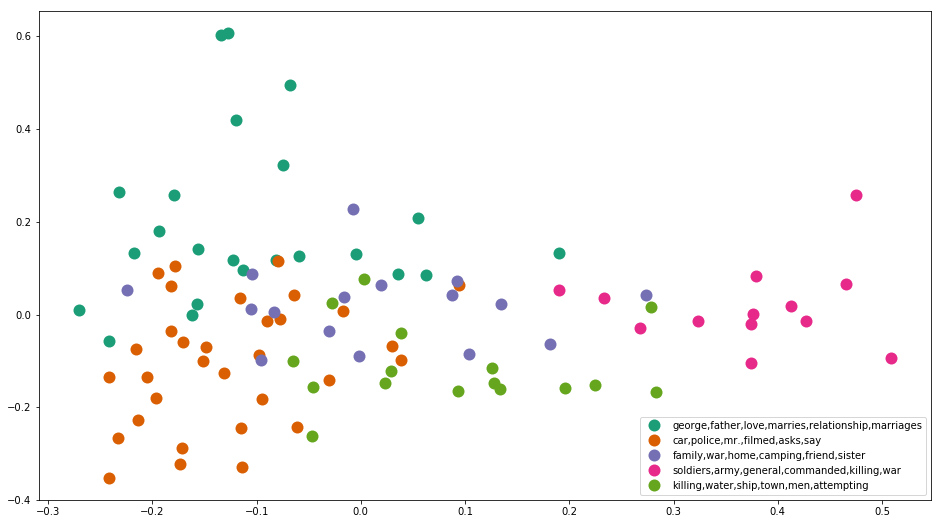

In [103]:
# set up plot
fig, ax = plt.subplots(figsize=(16, 9))
#set color for each group
for name,group in groups:
    ax.plot(group.x,group.y, marker='o',linestyle='', ms=12,
           label=cluster_names[name],color=cluster_colors[name], mec='none')
    
ax.legend(numpoints=1,loc=4)
plt.show()

## Part 5: Topic Modeling -Latent Dirichlet Allocation  LDA

In [105]:
#K-means is going to partition the N documents in K disjoint clusters 
#LDA assigns a document to a mixture of topics. Therefore each document is characterized by one or more topics 
#(e.g. Document D belongs for 60% to Topic A, 30% to topic B and 10% to topic E)
#Hence, LDA can give more realistic results than k-means for topic assignment.

#use synopses to build a 100*538 matrix
terms_dict={tf_selected_words[x]: x for x in xrange(len(tf_selected_words))}

feature_matrix_synopses_tf=[]
for i in synopses:
    current_doc_stats=[0]*len(tf_selected_words)
    allwords_stemmed=tokenization_stemming(i)
    for term in allwords_stemmed:
        if term in tf_selected_words:
            current_doc_stats[terms_dict[term]] +=1
    current_doc_stats=np.asarray(current_doc_stats)
    feature_matrix_synopses_tf.append(current_doc_stats)

feature_matrix_synopses_tf=np.asarray(feature_matrix_synopses_tf) # 100*538 matrix

In [106]:
feature_matrix_synopses_tf[0]

array([ 1,  0,  0,  7,  0,  1,  4,  3,  0,  0,  1,  1,  0,  4,  0,  0,  1,
        1,  0,  1,  1,  2,  1,  0,  1,  4,  1,  0,  1,  0,  1,  1,  1,  2,
        0,  0,  5,  0,  3,  9,  1,  0,  0,  4,  8,  1,  0,  0,  0,  1,  6,
        0,  1,  0,  2,  2,  4,  6,  0,  3,  0,  1,  0,  0,  1,  0,  1,  0,
        1,  0,  4,  0,  2,  2,  6,  1,  0, 16,  3,  1,  0,  5,  0,  9,  0,
        3,  2,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  0,
        0,  0,  3,  6,  2,  0,  0,  1,  0,  0,  2,  1,  4,  5,  0,  1,  0,
        1,  0,  2,  1,  0,  4,  3,  0,  1,  0,  0,  0,  0,  0,  7,  6,  3,
        8,  7,  2,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  3,  1,  0,
        0,  1,  0,  0,  2,  0,  0,  0,  4,  0,  1,  1,  1,  0,  2,  0,  0,
        8,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  4,
        1,  2,  0,  0,  3, 49,  0, 18,  2,  1,  0,  0,  0,  0,  3,  0,  0,
        0,  0,  0,  0,  1,  0,  2,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,
        1,  0,  0,  1,  8

In [107]:
model=lda.LDA(n_topics=5,n_iter=500,random_state=1)

In [108]:
model.fit(feature_matrix_synopses_tf)
topic_word=model.topic_word_ # model.topic_word_ saves the importance of tf_selected_words in LDA model, 
                             # the shape is (n_topics,num_of_selected_words) 
                             #(5*538)

doc_topic=model.doc_topic_ # model.doc_topic_ saves the documenttopic results
                           # the shape of (num_of_documents,n_topics)
                           # (100,5)

INFO:lda:n_documents: 100
INFO:lda:vocab_size: 538
INFO:lda:n_words: 61218
INFO:lda:n_topics: 5
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -484683
INFO:lda:<10> log likelihood: -428330
INFO:lda:<20> log likelihood: -412489
INFO:lda:<30> log likelihood: -406790
INFO:lda:<40> log likelihood: -403019
INFO:lda:<50> log likelihood: -400070
INFO:lda:<60> log likelihood: -398296
INFO:lda:<70> log likelihood: -397266
INFO:lda:<80> log likelihood: -395732
INFO:lda:<90> log likelihood: -395476
INFO:lda:<100> log likelihood: -394666
INFO:lda:<110> log likelihood: -394617
INFO:lda:<120> log likelihood: -393980
INFO:lda:<130> log likelihood: -393121
INFO:lda:<140> log likelihood: -392773
INFO:lda:<150> log likelihood: -392559
INFO:lda:<160> log likelihood: -392274
INFO:lda:<170> log likelihood: -391875
INFO:lda:<180> log likelihood: -392254
INFO:lda:<190> log likelihood: -391966
INFO:lda:<200> log likelihood: -391777
INFO:lda:<210> log likelihood: -391467
INFO:lda:<220> log likelihood: -3910

In [109]:
topic_keywords_list=[]
for i, topic_dist in enumerate(topic_word):
    lda_topic_words=np.array(tf_selected_words)[np.argsort(topic_dist)][:-7:-1]
    for j in xrange(len(lda_topic_words)):
        lda_topic_words[j]=vocab_frame_dict[lda_topic_words[j]]
    topic_keywords_list.append(lda_topic_words.tolist())

In [110]:
topic_doc_dict={}

print '<Document clustering result in LDA>'
for i in xrange(len(doc_topic)):
    topicID=doc_topic[i].argmax()
    if topicID not in topic_doc_dict:
        topic_doc_dict[topicID]=[titles[i]]
    else:
        topic_doc_dict[topicID].append(titles[i])
for i in topic_doc_dict:
    print 'Cluster '+str(i)+' words: '+','.join(topic_keywords_list[i])
    print 'Cluster '+str(i)+' titles ('+str(len(topic_doc_dict[i]))+') movies: '
    print ', '.join(topic_doc_dict[i])
    print

<Document clustering result in LDA>
Cluster 0 words: george,war,soldiers,army,captain,commanded
Cluster 0 titles (10) movies: 
Schindler's List, Lawrence of Arabia, It's a Wonderful Life, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, Apocalypse Now, The Lord of the Rings: The Return of the King, Patton, Dances with Wolves, Stagecoach, Mutiny on the Bounty

Cluster 1 words: car,away,police,meet,helping,apartment
Cluster 1 titles (13) movies: 
Titanic, The Silence of the Lambs, The Apartment, The Pianist, The French Connection, It Happened One Night, Fargo, The Graduate, The Maltese Falcon, Double Indemnity, Rebel Without a Cause, Rear Window, North by Northwest

Cluster 2 words: father,family,new,end,life,years
Cluster 2 titles (28) movies: 
The Godfather, Casablanca, Citizen Kane, The Godfather: Part II, Sunset Blvd., Forrest Gump, The Sound of Music, Singin' in the Rain, Amadeus, A Streetcar Named Desire, The Best Years of Our Lives, Doctor Zhivago, Braveheart,